# Predicting house price

A project to predict the house price in Banglore in India. 
Dataset from : https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data into a df
df = pd.read_csv('bengaluru_house_prices.csv')
df.head(10)

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
5  Super built-up  Area  Ready To Move                Whitefield      2 BHK   
6  Super built-up  Area         18-May          Old Airport Road      4 BHK   
7  Super built-up  Area  Ready To Move              Rajaji Nagar      4 BHK   
8  Super built-up  Area  Ready To Move              Marathahalli      3 BHK   
9            Plot  Area  Ready To Move              Gandhi Bazar  6 Bedroom   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
5  DuenaTa       1170   2.0      1.0   38.00  
6  Jaades        2732   4.0      NaN  204.00  
7  Brway G       3300   4.0      NaN  600.00  
8      NaN       1310   3.0      1.0   63.25  
9      NaN       1020   6.0      NaN  370.00

In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
# drop cols
df.drop(['area_type', 'availability', 'society', 'balcony'], axis="columns", inplace=True)
df.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

### Handle NaN value

In [8]:
df.shape

(13320, 5)

In [9]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
# drop na cols
df1 = df.dropna()
df1.shape

(13246, 5)

In [11]:
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Feature engineering

***Add a col 'bedroom' instead of 'size' col***

In [12]:
df1['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
13 BHK           1
43 Bedroom       1
27 BHK           1
19 BHK           1
18 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
Name: size, dtype: int64

In [13]:
# split with space and take the first index for bedroom
df1['bedroom'] = df1['size'].apply(lambda x: int(x.split(' ')[0]) )
df1['bedroom'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
# drop size col
df2 = df1.drop(['size'], axis="columns")
df2.head()

location total_sqft  bath   price  bedroom
0  Electronic City Phase II       1056   2.0   39.07        2
1          Chikka Tirupathi       2600   5.0  120.00        4
2               Uttarahalli       1440   2.0   62.00        3
3        Lingadheeranahalli       1521   3.0   95.00        3
4                  Kothanur       1200   2.0   51.00        2

***Explore total_sqft col***

In [15]:
# method to detect float values -> to find non-float formats
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
diff_format_total_sqft =  df2[~df2['total_sqft'].apply(is_float)]
diff_format_total_sqft.head(10)

location      total_sqft  bath    price  bedroom
30            Yelahanka     2100 - 2850   4.0  186.000        4
122              Hebbal     3067 - 8156   4.0  477.000        4
137  8th Phase JP Nagar     1042 - 1105   2.0   54.005        2
165            Sarjapur     1145 - 1340   2.0   43.490        2
188            KR Puram     1015 - 1540   2.0   56.800        2
410             Kengeri  34.46Sq. Meter   1.0   18.500        1
549         Hennur Road     1195 - 1440   2.0   63.770        2
648             Arekere       4125Perch   9.0  265.000        9
661           Yelahanka     1120 - 1145   2.0   48.130        2
672        Bettahalsoor     3090 - 5002   4.0  445.000        4

In [17]:
len(diff_format_total_sqft)

190

In [18]:
# method to convert total_sqft into same format
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
df3 =df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num) # convert the col to float
df3 = df3[df3.total_sqft.notnull()] # to remove null values (null total_sqft)
df3.head()

location  total_sqft  bath   price  bedroom
0  Electronic City Phase II      1056.0   2.0   39.07        2
1          Chikka Tirupathi      2600.0   5.0  120.00        4
2               Uttarahalli      1440.0   2.0   62.00        3
3        Lingadheeranahalli      1521.0   3.0   95.00        3
4                  Kothanur      1200.0   2.0   51.00        2

In [20]:
df3.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bedroom       0
dtype: int64

In [21]:
df3.loc[30] # has changed into avg

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bedroom               4
Name: 30, dtype: object

In [22]:
# check for different format in 'bath'
len(df3[~df3['bath'].apply(is_float)])

0

In [23]:
# check for different format in 'price'
len(df3[~df3['price'].apply(is_float)])

0

***Add a new feature 'price_per_sqft'***

In [24]:
df4 = df3.copy()
df4['price_per_sqft'] = df4.price*100000/df4.total_sqft
df4.head()

location  total_sqft  bath   price  bedroom  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07        2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00        4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00        3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00        3     6245.890861
4                  Kothanur      1200.0   2.0   51.00        2     4250.000000

In [25]:
df4.to_csv('price_per_sqft.csv', index=False)

***Explore location***

In [33]:
df4.shape

(13200, 6)

In [34]:
df4.location = df4.location.apply(lambda x: x.strip())

# no of unique locations
len(df4.location.value_counts())

241

In [35]:
loc_stat = df4.location.value_counts(ascending=False)
loc_stat

other                        2872
Whitefield                    533
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                264
                             ... 
Tindlu                         11
Marsur                         11
Pattandur Agrahara             11
2nd Phase Judicial Layout      11
HAL 2nd Stage                  11
Name: location, Length: 241, dtype: int64

In [36]:
loc_less_than_10 = loc_stat[loc_stat <= 10]
loc_less_than_10

Series([], Name: location, dtype: int64)

In [37]:
len(loc_less_than_10)

0

In [38]:
# location less than 10 -> 'other'
df4.location = df4.location.apply(lambda x: 'other' if x in loc_less_than_10
                                 else x)
len(df4.location.unique())

241

In [39]:
df4.head(10)

location  total_sqft  bath   price  bedroom  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07        2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00        4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00        3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00        3     6245.890861
4                  Kothanur      1200.0   2.0   51.00        2     4250.000000
5                Whitefield      1170.0   2.0   38.00        2     3247.863248
6          Old Airport Road      2732.0   4.0  204.00        4     7467.057101
7              Rajaji Nagar      3300.0   4.0  600.00        4    18181.818182
8              Marathahalli      1310.0   3.0   63.25        3     4828.244275
9                     other      1020.0   6.0  370.00        6    36274.509804

### Outlier removing

#### Assume area per bedroom is 300 sqft to detect outliers

In [40]:
df4.shape

(13200, 6)

In [43]:
# to check sqft_per_bedroom is less than 300
df4[df4.total_sqft/df4.bedroom < 300]

location  total_sqft  bath  price  bedroom  price_per_sqft
9                    other      1020.0   6.0  370.0        6    36274.509804
45              HSR Layout       600.0   9.0  200.0        8    33333.333333
58           Murugeshpalya      1407.0   4.0  150.0        6    10660.980810
68     Devarachikkanahalli      1350.0   7.0   85.0        8     6296.296296
70                   other       500.0   3.0  100.0        3    20000.000000
...                    ...         ...   ...    ...      ...             ...
13277                other      1400.0   7.0  218.0        7    15571.428571
13279                other      1200.0   5.0  130.0        6    10833.333333
13281      Margondanahalli      1375.0   5.0  125.0        5     9090.909091
13303       Vidyaranyapura       774.0   5.0   70.0        5     9043.927649
13311     Ramamurthy Nagar      1500.0   9.0  250.0        7    16666.666667

[744 rows x 6 columns]

Above raw can be errors and those ill be removed

In [44]:
df5 = df4[~(df4.total_sqft/df4.bedroom < 300)]   # take only correct raws
df5.shape

(12456, 6)

#### Check price_per_sqft based on location

In [47]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [59]:
import numpy as np

# remove outliers considering price_per_sqft based on location
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & 
                          (subdf.price_per_sqft<=(mean+std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df6 = remove_price_per_sqft_outliers(df5)
df6.shape

(10242, 6)

In [73]:
df6.head()

location  total_sqft  bath  price  bedroom  price_per_sqft
0  1st Block Jayanagar      2850.0   4.0  428.0        4    15017.543860
1  1st Block Jayanagar      1630.0   3.0  194.0        3    11901.840491
2  1st Block Jayanagar      1875.0   2.0  235.0        3    12533.333333
3  1st Block Jayanagar      1200.0   2.0  130.0        3    10833.333333
4  1st Block Jayanagar      1235.0   2.0  148.0        2    11983.805668

#### For a given location,  3 bedroom property price vs 2 bedroom property price - detecting outliers

In the same location, 3 bedroom property price is less than 2 bedroom property price even though the total_sqft is same 

In [74]:
import matplotlib
def plot_scatter(df,location):
    bedroom2 = df[(df.location==location) & (df.bedroom==2)]
    bedroom3 = df[(df.location==location) & (df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (12,8)
    plt.scatter(bedroom2.total_sqft, bedroom2.price, color='blue', marker='.', label='2 bedrooms', s=50)
    plt.scatter(bedroom3.total_sqft, bedroom3.price, color='green', marker='+', label='3 bedrooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

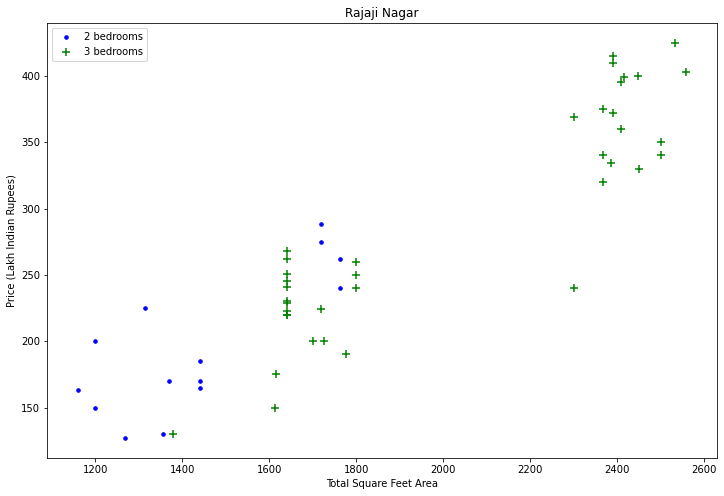

In [75]:
plot_scatter(df6,"Rajaji Nagar")

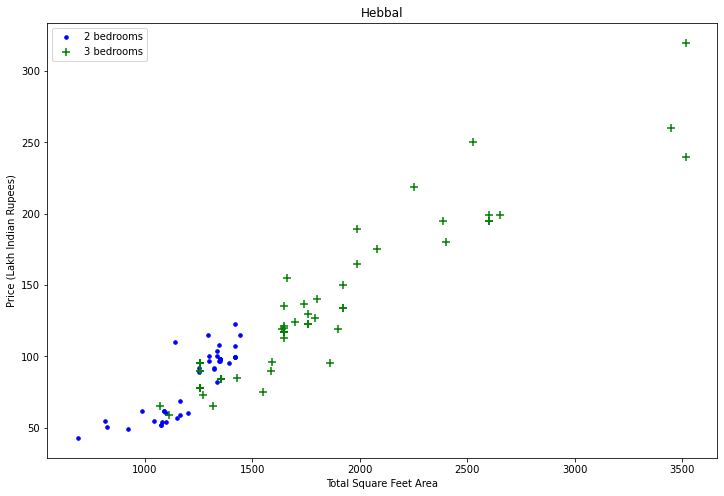

In [77]:
plot_scatter(df6,"Hebbal")

In [78]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bd_stats = {}
        for bd, bd_df in location_df.groupby('bedroom'):
            bd_stats[bd] = {
                'mean': np.mean(bd_df.price_per_sqft),
                'std': np.std(bd_df.price_per_sqft),
                'count': bd_df.shape[0]
            }
        for bd, bd_df in location_df.groupby('bedroom'):
            stats = bd_stats.get(bd-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bd_df[bd_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [79]:
df7 = remove_bedroom_outliers(df6)
df7.shape

(7317, 6)

check after removing outliers

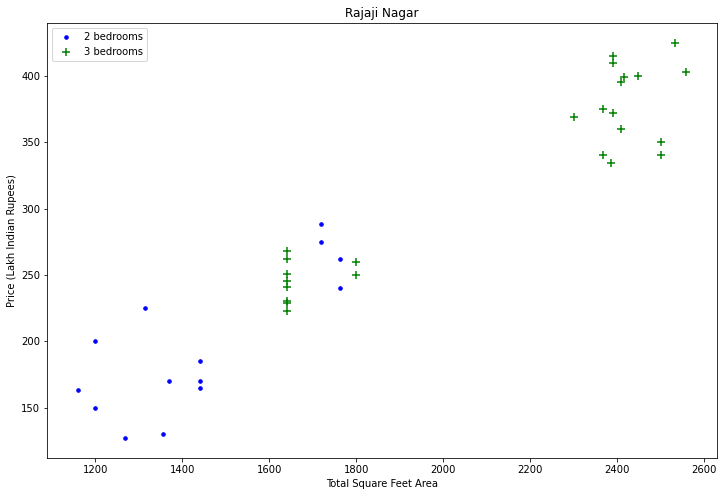

In [80]:
plot_scatter(df7,"Rajaji Nagar")

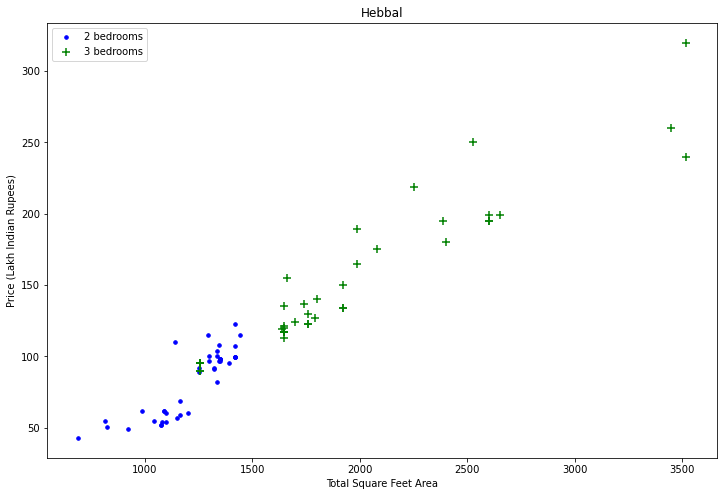

In [81]:
plot_scatter(df7,"Hebbal")

Text(0, 0.5, 'frequency')

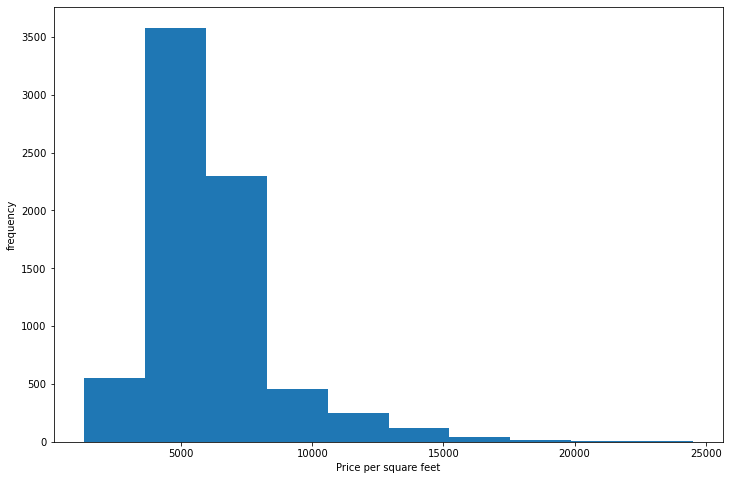

In [82]:
plt.hist(df7.price_per_sqft)
plt.xlabel('Price per square feet')
plt.ylabel('frequency')

#### Bathroom feature

In [84]:
df7.bath.value_counts()

2.0     4188
3.0     1763
1.0      568
4.0      501
5.0      175
6.0       81
7.0       16
8.0       13
9.0        7
12.0       3
13.0       1
16.0       1
Name: bath, dtype: int64

Text(0, 0.5, 'frequency')

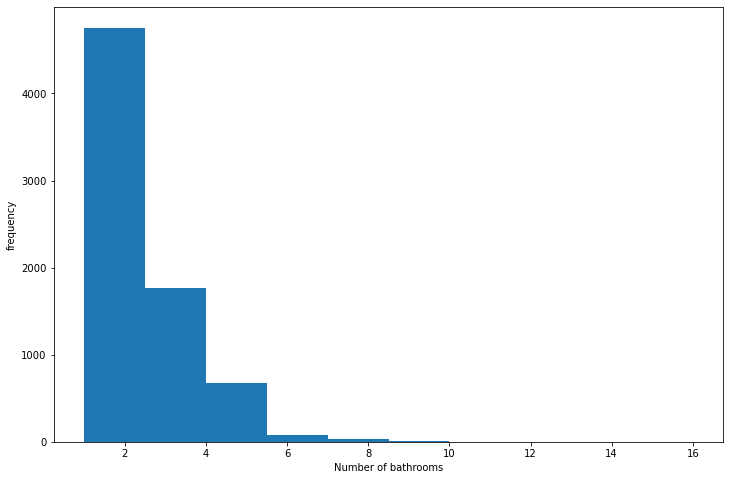

In [85]:
plt.hist(df7.bath)
plt.xlabel('Number of bathrooms')
plt.ylabel('frequency')

In [90]:
# no. of bathroom more than 8
df7[df7.bath>8]

location  total_sqft  bath   price  bedroom  price_per_sqft
3775               KR Puram      4600.0   9.0   200.0        9     4347.826087
5113            Mico Layout      5000.0   9.0   210.0        9     4200.000000
5277         Neeladri Nagar      4000.0  12.0   160.0       10     4000.000000
5660  Raja Rajeshwari Nagar      3600.0   9.0   240.0        9     6666.666667
8022                  other      5000.0   9.0   360.0       11     7200.000000
8408                  other     11338.0   9.0  1000.0        6     8819.897689
8483                  other     12000.0  12.0   525.0       10     4375.000000
8572                  other     10000.0  16.0   550.0       16     5500.000000
8758                  other      4500.0   9.0   500.0        9    11111.111111
9306                  other      6000.0  12.0   150.0       11     2500.000000
9607                  other      3300.0   9.0   450.0       10    13636.363636
9637                  other      5425.0  13.0   275.0       13     5069.124424

In [91]:
# having bathrooms, no of bedroom +2
df7[df7.bath>df7.bedroom+2]

location  total_sqft  bath   price  bedroom  price_per_sqft
1626  Chikkabanavar      2460.0   7.0    80.0        4     3252.032520
5238     Nagasandra      7000.0   8.0   450.0        4     6428.571429
6711    Thanisandra      1806.0   6.0   116.0        3     6423.034330
8408          other     11338.0   9.0  1000.0        6     8819.897689

_remove,  when having bathrooms more than no. of bedroom + 1_

In [ ]:
df8 = df7[df7.bath<=df7.bedroom+1]
df8.shape

In [95]:
len(df8[df8.bath>df8.bedroom+2])

0

In [98]:
# drop price_per_sqft
df9 = df8.drop(['price_per_sqft'], axis="columns")
df9.head()

location  total_sqft  bath  price  bedroom
0  1st Block Jayanagar      2850.0   4.0  428.0        4
1  1st Block Jayanagar      1630.0   3.0  194.0        3
2  1st Block Jayanagar      1875.0   2.0  235.0        3
3  1st Block Jayanagar      1200.0   2.0  130.0        3
4  1st Block Jayanagar      1235.0   2.0  148.0        2

### Create dummy variables for location

In [110]:
location_dummies = pd.get_dummies(df9.location)
location_dummies.head()

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   
3                    1                   0                          0   
4                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   
3                   0  ...                     0                   0   
4                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   
3            0           0               0          0                   0   
4            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  

[5 rows x 241 columns]

In [111]:
df9.shape

(7239, 5)

In [112]:
# remove other column
location_dummies.drop(['other'], axis="columns", inplace=True)

In [114]:
# concat dummies with original dataframe
df10 = pd.concat([df9, location_dummies], axis='columns')
df10.head()

location  total_sqft  bath  price  bedroom  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0        4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0        3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0        3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0        3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0        2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [115]:
# remove location
df11 = df10.drop(['location'], axis="columns")

In [117]:
df11.head()

total_sqft  bath  price  bedroom  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0        4                    1                   0   
1      1630.0   3.0  194.0        3                    1                   0   
2      1875.0   2.0  235.0        3                    1                   0   
3      1200.0   2.0  130.0        3                    1                   0   
4      1235.0   2.0  148.0        2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   
2                   0  ...            0                     0   
3                   0  ...            0                     0   
4                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 244 columns]

In [118]:
df11.shape

(7239, 244)

## Build the model

In [121]:
x = df11.drop(['price'], axis="columns")
x.head()

total_sqft  bath  bedroom  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0        4                    1                   0   
1      1630.0   3.0        3                    1                   0   
2      1875.0   2.0        3                    1                   0   
3      1200.0   2.0        3                    1                   0   
4      1235.0   2.0        2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   
3                   0                   0  ...            0   
4                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  

[5 rows x 243 columns]

In [123]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

_Using LinearRegression_

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [125]:
len(x_train)

5791

In [126]:
len(x_test)

1448

In [127]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8629132245229442

use KFold cross validation to check the accuracy of LinearRegression

In [129]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # for better split
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

get 80% accuracy all the time using LinearRegression

### Find best model using GridSearchCV

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ['mse','friedman_mse'],
            'splitter': ['best','random']
        }
    }
}

In [133]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # for better split data

for model_name, mp in model_params.items():
    gscv = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    gscv.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': gscv.best_score_,
        'best_params': gscv.best_params_
    })
    
select_best_model = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [134]:
select_best_model

model  best_score                                 best_params
0  linear_regression    0.847796                        {'normalize': False}
1      decision_tree    0.753673  {'criterion': 'mse', 'splitter': 'random'}

_According to above result also, Linear regression is best_

***test the model for some examples***

In [137]:
# to predict price -> to get the exact location column
def predict(location,total_sqft,bath,bedroom):    
    location_index = np.where(x.columns==location)[0][0]  # return the relevent col for the entered location

    x_input = np.zeros(len(x.columns)) # new array to store input
    x_input[0] = total_sqft
    x_input[1] = bath
    x_input[2] = bedroom
    if location_index >= 0:
        x_input[location_index] = 1

    return lr.predict([x_input])[0]

In [138]:
predict('1st Phase JP Nagar',1000, 2, 2)

83.86570258312345

In [140]:
predict('1st Phase JP Nagar',1000, 2, 3)

82.36367614310346

In [141]:
predict('1st Phase JP Nagar',1000, 3, 2)

87.58264928989111

In [143]:
predict('Indira Nagar',1000, 2, 2)

193.3119773317996

### Save the model into a pickle file

In [144]:
import pickle
with open('house_price_model.pickle','wb') as f:
    pickle.dump(lr,f)

#### export to a file with columns

In [145]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))